In [33]:
import os
import numpy as np
import pandas as pd
import glob

from tqdm.notebook import tqdm
import pydicom

import PIL.Image as Image

FILE_EXTENSION = ['.png', '.PNG', '.jpg', '.JPG', '.dcm', '.DCM', '.raw', '.RAW', '.svs', '.SVS']
IMG_EXTENSION = ['.png', '.PNG', '.jpg', '.JPG', '.jpeg', '.JPEG']
DCM_EXTENSION = ['.dcm', '.DCM']
RAW_EXTENSION = ['.raw', '.RAW']
NIFTI_EXTENSION = ['.nii']
NP_EXTENSION = ['.npy']

mask_common_dir = '/home/ncp/workspace/202002n050/050.신경계 질환 관련 임상 및 진료 데이터'
common_dir = '/home/ncp/workspace/202002n050/050.신경계 질환 관련 임상 및 진료 데이터' 

def check_extension(filename, extension_ls=FILE_EXTENSION):
    return any(filename.endswith(extension) for extension in extension_ls)


def load_file_path(folder_path, extension_ls=FILE_EXTENSION, all_sub_folders=False):
    """find 'IMG_EXTENSION' file paths in folder.
    
    Parameters:
        folder_path (str) -- folder directory
        extension_ls (list) -- list of extensions
    
    Return:
        file_paths (list) -- list of 'extension_ls' file paths
    """
    
    file_paths = []
    assert os.path.isdir(folder_path), f'{folder_path} is not a valid directory'

    for root, _, fnames in sorted(os.walk(folder_path)):
        for fname in fnames:
            if check_extension(fname, extension_ls):
                path = os.path.join(root, fname)
                file_paths.append(path)
        if not all_sub_folders:
            break

    return file_paths[:]


def gen_new_dir(new_dir):
    try: 
        if not os.path.exists(new_dir): 
            os.makedirs(new_dir) 
            #print(f"New directory!: {new_dir}")
    except OSError: 
        print("Error: Failed to create the directory.")

In [2]:
## data preprocessing ##

In [3]:
def find_aihub_img_dir(common_dir, fname, folder='train'):
    if folder == 'train':
        img_dir = os.path.join(common_dir, '01.데이터/1.Training/원천데이터', fname, 'init/image')
    elif folder == 'val':
        img_dir = os.path.join(common_dir, '01.데이터/2.Validation/원천데이터', fname, 'init/image')
    else:
        return None
    return img_dir

In [4]:
MR_SEQUENCE = {'T2' : '*ep_b0', 
               'DWI' : '*ep_b1000t', 
               'ADC' : '*ep_b0_1000'}


def find_aihub_dicom_dir(common_dir, fname, folder='train'):
    if folder == 'train':
        dicom_dir = os.path.join(common_dir, '01.데이터/1.Training/원천데이터', fname, 'init')
    elif folder == 'val':
        dicom_dir = os.path.join(common_dir, '01.데이터/2.Validation/원천데이터', fname, 'init')
    else:
        return None
    return dicom_dir


def get_aihub_case_name(common_dir, folder='train'):
    if folder=='train':
        data_dir = os.path.join(common_dir, '01.데이터/1.Training/원천데이터')
    elif folder=='val':
        data_dir = os.path.join(common_dir, '01.데이터/2.Validation/원천데이터')
        
    _fname = os.listdir(data_dir)
    _fname = [p for p in _fname if os.path.isdir(os.path.join(data_dir, p))]
    
    return _fname


def check_aihub_mr_scans(patient_folder_path, norm=True, sequence='DWI'):
    dcm_paths = sorted(load_file_path(patient_folder_path, DCM_EXTENSION))
    
    sequence_dcm_paths = [[dcm_path, pydicom.read_file(dcm_path, force=True)] for dcm_path in dcm_paths]
    sequence_dcm_paths = [p for p, s in sequence_dcm_paths if MR_SEQUENCE[sequence] == s.get('SequenceName')]
#     dcm_paths = sorted(load_file_path(patient_folder_path, DCM_EXTENSION))
    
#     sequence_dcm_paths = []
#     for dcm_path in dcm_paths:
#         tmp_info = pydicom.read_file(dcm_path, defer_size='20KB', force=True)
#         if MR_SEQUENCE[sequence] == tmp_info.get("Sequence Name"):
#             sequence_dcm_paths.append(dcm_path)
        
    return sequence_dcm_paths

In [5]:
# pre_good_mrs, age, ini_nih, END, hx_str
# good outcome -> bad outcome

In [7]:
aihub_df = pd.read_csv('/home/ncp/workspace/imputated_all_merged_df_V1.925.1.csv')

In [8]:
def find_aihub_img_mask_fname(common_dir, folder='train'):
    if folder=='train':
        data_dir = os.path.join(common_dir, '01.데이터/1.Training/원천데이터')
    elif folder=='val':
        data_dir = os.path.join(common_dir, '01.데이터/2.Validation/원천데이터')
        
    _fname = os.listdir(data_dir)
    _fname = [p for p in _fname if os.path.isdir(os.path.join(data_dir, p))]
    return _fname

In [10]:
train_fname = find_aihub_img_mask_fname(mask_common_dir, folder='train')
val_fname = find_aihub_img_mask_fname(mask_common_dir, folder='val')
def check_folder_dir(fname):
    if fname in train_fname:
        return 'train'
    elif fname in val_fname:
        return 'val'
    else:
        return None
    
def split_train_val_test(fname):
    if fname in train_fname:
        return 'train'
    elif fname in val_fname:
        return 'val'
    elif fname in test_fname:
        return 'test'
    else:
        return None

In [12]:
aihub_df

name  bad_outcome_3m  bgic  binary_dtx_anticoa  \
0     brain_mri_1000001               1     0                   1   
1     brain_mri_1000003               0     0                   0   
2     brain_mri_1000006               0     0                   0   
3     brain_mri_1000007               0     0                   0   
4     brain_mri_1000008               0     0                   0   
...                 ...             ...   ...                 ...   
4864  brain_mri_CC_1196               0     0                   0   
4865  brain_mri_CC_1197               0     0                   0   
4866  brain_mri_CC_1198               0     0                   0   
4867  brain_mri_CC_1199               1     0                   0   
4868  brain_mri_CC_1200               1     0                   1   

      binary_dtx_antiplt  cere  coro  Cortex  death_3m  END  ...   hct   hdl  \
0                      1     0     0       1         1    1  ...  44.4  35.0   
1                      1     0     1       1         1    0  ...  39.8  39.0   
2                      1     1     0       0         1    0  ...  41.6  37.0   
3                      1     0     0       1         0    0  ...  40.1  52.0   
4                      1     0     0       0         0    0  ...  40.8  66.0   
...                  ...   ...   ...     ...       ...  ...  ...   ...   ...   
4864                   1     0     0       1         1    0  ...  42.1  40.0   
4865                   1     0     0       0         1    0  ...  36.4  53.0   
4866                   1     0     0       0         1    0  ...  48.2  45.0   
4867                   1     0     0       0         1    0  ...  34.6  46.0   
4868                   0     0     0       0         1    1  ...  44.6  27.0   

        fbs    plt    ldl    pt       i_glu    sbp   dbp  nihadm  
0     136.0  180.0   64.0  0.99   98.000000  156.0  85.0     NaN  
1     148.0  223.0  111.0  0.91  150.000000  139.0  71.0     NaN  
2     140.0  187.0   40.0  0.96  213.000000  133.0  67.0     NaN  
3     181.0  170.0  104.0  0.92  181.000000  179.0  81.0     NaN  
4     180.0  285.0  175.0  0.93  203.000000  180.0  90.0     NaN  
...     ...    ...    ...   ...         ...    ...   ...     ...  
4864   78.0  276.0   87.0  1.06  113.000000  140.0  80.0     NaN  
4865  252.0  178.0   84.0  0.97  274.430653  140.0  90.0     NaN  
4866   94.0  378.0  158.0  1.16  128.266384  160.0  70.0     NaN  
4867  113.0  236.0  140.0  0.93  142.000000  130.0  80.0     NaN  
4868  138.0  193.0   79.0  1.13  128.000000  130.0  70.0     NaN  

[4869 rows x 67 columns]

In [13]:
pred_aihub_df = aihub_df[['name', 'bad_outcome_3m','ini_nih', 'age', 'END', 'fbs', 'hx_str' ]]

In [14]:
pred_aihub_df['folder'] = pred_aihub_df['name'].map(lambda x: check_folder_dir(x))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
pred_aihub_df_clear = pred_aihub_df.copy()
# pred_aihub_df_clear['bad_outcome_3m'] = pred_aihub_df['bad_outcome_3m'].fillna(value=pred_aihub_df.mrs3mo)
# pred_aihub_df_clear = pred_aihub_df_clear[['name', 'bad_outcome_3m','ini_nih', 'age', 'END', 'fbs', 'hx_str' ]]
# pred_aihub_df_clear.isna().sum()
# pred_aihub_df_clear = pred_aihub_df_clear.dropna(axis=0)
# pred_aihub_df_clear = pred_aihub_df_clear.astype({'bad_outcome_3m' : int })

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
tot_fname_label = pred_aihub_df_clear[['name', 'bad_outcome_3m']].values
tot_fname = tot_fname_label[:,0]
tot_label = tot_fname_label[:,1]
train_fname, valtest_fname, train_label, valtest_label = train_test_split(tot_fname, 
                                                                    tot_label, 
                                                                    test_size=0.2, 
                                                                    random_state=77, 
                                                                    stratify=tot_label)
val_fname, test_fname, val_label, test_label = train_test_split(valtest_fname, 
                                                                valtest_label, 
                                                                test_size=0.5, 
                                                                random_state=77, 
                                                                stratify=valtest_label) 

In [21]:
def split_train_val_test(fname):
    if fname in train_fname:
        return 'train'
    elif fname in val_fname:
        return 'val'
    elif fname in test_fname:
        return 'test'
    else:
        return None

In [22]:
pred_aihub_df_clear['split_811'] = pred_aihub_df_clear['name'].map(lambda x: split_train_val_test(x))

In [23]:
pred_aihub_df_clear[pred_aihub_df_clear.split_811 == 'train']['bad_outcome_3m'].value_counts()

0    2701
1    1194
Name: bad_outcome_3m, dtype: int64

In [24]:
idx_mrs_3m_9 = pred_aihub_df_clear[pred_aihub_df_clear.bad_outcome_3m == 9].index
pred_aihub_df_clear = pred_aihub_df_clear.drop(idx_mrs_3m_9)

In [25]:
pred_aihub_df_clear

name  bad_outcome_3m  ini_nih        age  END    fbs  \
0     brain_mri_1000001               1        3  71.000000    1  136.0   
1     brain_mri_1000003               0        0  85.000000    0  148.0   
2     brain_mri_1000006               0        3  77.000000    0  140.0   
3     brain_mri_1000007               0        0  86.000000    0  181.0   
4     brain_mri_1000008               0        6  68.000000    0  180.0   
...                 ...             ...      ...        ...  ...    ...   
4864  brain_mri_CC_1196               0        2  69.000000    0   78.0   
4865  brain_mri_CC_1197               0        3  58.000000    0  252.0   
4866  brain_mri_CC_1198               0        0  34.000000    0   94.0   
4867  brain_mri_CC_1199               1        0  62.995347    0  113.0   
4868  brain_mri_CC_1200               1        8  85.000000    1  138.0   

      hx_str folder split_811  
0          0  train       val  
1          0  train     train  
2          0  train       val  
3          0  train     train  
4          0  train     train  
...      ...    ...       ...  
4864       0  train     train  
4865       0  train     train  
4866       0  train     train  
4867       0  train     train  
4868       0  train     train  

[4869 rows x 9 columns]

In [26]:
pred_aihub_df_clear.to_csv('/home/ncp/workspace/blocks1/aihub_df.csv', index=False)

In [27]:
from tqdm import tqdm

In [28]:
aihub_df = pd.read_csv('/home/ncp/workspace/blocks1/aihub_df.csv')

In [31]:
dcm_exist_list_0 = []
folder = 'val'
case_name_ls = get_aihub_case_name(common_dir, folder=folder)

In [34]:
dcm_exist_list_0 = []
folder = 'val'
case_name_ls = get_aihub_case_name(common_dir, folder=folder)
for N in tqdm(range(len(case_name_ls))):
    
    sample_case_name = case_name_ls[N]
    sample_case_png_dir = find_aihub_img_dir(common_dir, sample_case_name, folder=folder)
    sample_case_dicom_dir = find_aihub_dicom_dir(common_dir, sample_case_name, folder=folder)

    if sample_case_dicom_dir:
        if os.path.isdir(sample_case_png_dir):
            png_len = len(load_file_path(sample_case_png_dir, IMG_EXTENSION))
            sample_dicom_list = load_file_path(sample_case_dicom_dir, DCM_EXTENSION)
            sample_seq_dwi_list = check_aihub_mr_scans(sample_case_dicom_dir, sequence='DWI')
            sample_seq_adc_list = check_aihub_mr_scans(sample_case_dicom_dir, sequence='ADC')
            if (png_len == len(sample_seq_dwi_list)) & (png_len == len(sample_seq_adc_list)):
                dcm_exist_list_0.append(sample_case_name)
    else:
        pass

  0%|          | 0/600 [00:00<?, ?it/s]

In [35]:
dcm_exist_list = []
folder = 'train'
case_name_ls = get_aihub_case_name(common_dir, folder=folder)
for N in tqdm(range(len(case_name_ls))):
    
    sample_case_name = case_name_ls[N]
    sample_case_png_dir = find_aihub_img_dir(common_dir, sample_case_name, folder=folder)
    sample_case_dicom_dir = find_aihub_dicom_dir(common_dir, sample_case_name, folder=folder)

    if sample_case_dicom_dir:
        if os.path.isdir(sample_case_png_dir):
            png_len = len(load_file_path(sample_case_png_dir, IMG_EXTENSION))
            sample_dicom_list = load_file_path(sample_case_dicom_dir, DCM_EXTENSION)
            sample_seq_dwi_list = check_aihub_mr_scans(sample_case_dicom_dir, sequence='DWI')
            sample_seq_adc_list = check_aihub_mr_scans(sample_case_dicom_dir, sequence='ADC')
            if (png_len == len(sample_seq_dwi_list)) & (png_len == len(sample_seq_adc_list)):
                dcm_exist_list.append(sample_case_name)
    else:
        pass

  0%|          | 0/4800 [00:00<?, ?it/s]

/opt/conda/lib/python3.6/site-packages/pydicom/charset.py:746: UserWarning: Unknown encoding 'ISO IR 149' - using default encoding instead
  _warn_about_invalid_encoding(encoding)
/opt/conda/lib/python3.6/site-packages/pydicom/charset.py:754: UserWarning: Unknown encoding 'ISO_IR 149' - using default encoding instead
  _warn_about_invalid_encoding(encoding)


In [36]:
def check_dicom_header_sequence(fname):
    if fname in dcm_exist_list:
        return 1
    else:
        return 0

In [37]:
aihub_df['dcm_header_seq'] = aihub_df['name'].map(lambda x: check_dicom_header_sequence(x))

In [39]:
aihub_df.to_csv('/home/ncp/workspace/blocks1/3D_CNN_for_PRED/aihub_df_check_dwi.csv', index=False)

In [40]:
name_folder = aihub_df[aihub_df['dcm_header_seq'] == 0][['name', 'folder']].values

In [41]:
def split_dwi_adc_in_fname(path_ls):
    fname_path_ls = [[os.path.splitext(os.path.basename(p))[0].upper(), p] for p in path_ls]
    dwi_path_ls = [p for fname, p in fname_path_ls if 'DW' in fname]
    adc_path_ls = [p for fname, p in fname_path_ls if 'AD' in fname]
    return sorted(dwi_path_ls), sorted(adc_path_ls)

In [42]:
dicom_exist_list_2 = []

for N in tqdm(range(len(name_folder))):
    name, folder = name_folder[N]
    case_png_dir = find_aihub_img_dir(common_dir, name, folder=folder)
    case_dicom_dir = find_aihub_dicom_dir(common_dir, name, folder=folder)
    if os.path.isdir(case_dicom_dir):
        case_dicom_paths = sorted(load_file_path(case_dicom_dir, DCM_EXTENSION))
        case_first_dicom_fname = os.path.splitext(os.path.basename(case_dicom_paths[0]))[0].upper()
        if 'AD' in case_first_dicom_fname:
            if os.path.isdir(case_png_dir):
                png_len = len(load_file_path(case_png_dir, IMG_EXTENSION))
                dwi_path_ls, adc_path_ls = split_dwi_adc_in_fname(case_dicom_paths)
                if png_len == len(dwi_path_ls):
                    dicom_exist_list_2.append(name)

  0%|          | 0/4116 [00:00<?, ?it/s]

In [43]:
def check_fname_dwi_adc(fname):
    if fname in dicom_exist_list_2:
        return 1
    else:
        return 0

In [45]:
aihub_df = aihub_df[['name', 'bad_outcome_3m','ini_nih', 'age', 'END', 'fbs', 'hx_str', 'folder', 'split_811', 'dcm_header_seq']]

In [46]:
aihub_df['fname_dwi_adc'] = aihub_df['name'].map(lambda x: check_fname_dwi_adc(x))

In [47]:
dicom_exist_list_3 = []

for N in tqdm(range(len(name_folder))):
    name, folder = name_folder[N]
    case_png_dir = find_aihub_img_dir(common_dir, name, folder=folder)
    case_dicom_dir = find_aihub_dicom_dir(common_dir, name, folder=folder)
    if os.path.isdir(case_dicom_dir):
        case_dicom_paths = sorted(load_file_path(case_dicom_dir, DCM_EXTENSION))
        case_first_dicom_fname = os.path.splitext(os.path.basename(case_dicom_paths[0]))[0].upper()
        if 'AD' in case_first_dicom_fname:
            if os.path.isdir(case_png_dir):
                png_len = len(load_file_path(case_png_dir, IMG_EXTENSION))
                dwi_path_ls, adc_path_ls = split_dwi_adc_in_fname(case_dicom_paths)
                if png_len == int(len(dwi_path_ls)/2):
                    
                    dicom_exist_list_3.append(name)

  0%|          | 0/4116 [00:00<?, ?it/s]

In [48]:
def check_fname_dwi_adc_half(fname):
    if fname in dicom_exist_list_3:
        return 1
    else:
        return 0

In [49]:
aihub_df['fname_dwi_adc_half'] = aihub_df['name'].map(lambda x: check_fname_dwi_adc_half(x))

In [50]:
aihub_df.groupby(['dcm_header_seq', 'fname_dwi_adc', 'fname_dwi_adc_half']).count()

name  bad_outcome_3m  \
dcm_header_seq fname_dwi_adc fname_dwi_adc_half                         
0              0             0                    694             694   
                             1                   2305            2305   
               1             0                   1117            1117   
1              0             0                    753             753   

                                                 ini_nih   age   END   fbs  \
dcm_header_seq fname_dwi_adc fname_dwi_adc_half                              
0              0             0                       694   694   694   694   
                             1                      2305  2305  2305  2305   
               1             0                      1117  1117  1117  1117   
1              0             0                       753   753   753   753   

                                                 hx_str  folder  split_811  
dcm_header_seq fname_dwi_adc fname_dwi_adc_half                             
0              0             0                      694     694        694  
                             1                     2305    2305       2305  
               1             0                     1117    1117       1117  
1              0             0                      753     753        753

In [51]:
aihub_df.to_csv('/home/ncp/workspace/blocks1/aihub_df_define_dcm.csv', index=False)

In [52]:
pd.read_csv('/home/ncp/workspace/blocks1/aihub_df_define_dcm.csv')

name  bad_outcome_3m  ini_nih        age  END    fbs  \
0     brain_mri_1000001               1        3  71.000000    1  136.0   
1     brain_mri_1000003               0        0  85.000000    0  148.0   
2     brain_mri_1000006               0        3  77.000000    0  140.0   
3     brain_mri_1000007               0        0  86.000000    0  181.0   
4     brain_mri_1000008               0        6  68.000000    0  180.0   
...                 ...             ...      ...        ...  ...    ...   
4864  brain_mri_CC_1196               0        2  69.000000    0   78.0   
4865  brain_mri_CC_1197               0        3  58.000000    0  252.0   
4866  brain_mri_CC_1198               0        0  34.000000    0   94.0   
4867  brain_mri_CC_1199               1        0  62.995347    0  113.0   
4868  brain_mri_CC_1200               1        8  85.000000    1  138.0   

      hx_str folder split_811  dcm_header_seq  fname_dwi_adc  \
0          0  train       val               1              0   
1          0  train     train               1              0   
2          0  train       val               1              0   
3          0  train     train               1              0   
4          0  train     train               0              0   
...      ...    ...       ...             ...            ...   
4864       0  train     train               0              0   
4865       0  train     train               0              0   
4866       0  train     train               0              0   
4867       0  train     train               0              0   
4868       0  train     train               0              0   

      fname_dwi_adc_half  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  
...                  ...  
4864                   0  
4865                   0  
4866                   0  
4867                   0  
4868                   0  

[4869 rows x 12 columns]

In [53]:
aihub_df_dcm_failed = aihub_df[(aihub_df.dcm_header_seq==0)&(aihub_df.fname_dwi_adc==0)&(aihub_df.fname_dwi_adc_half==0)]

In [54]:
name_folder_dcm_fl = aihub_df_dcm_failed[['name', 'folder']].values

In [55]:
dicom_exist_list_4 = []

for N in tqdm(range(len(name_folder))):
    name, folder = name_folder[N]
    case_png_dir = find_aihub_img_dir(common_dir, name, folder=folder)
    case_dicom_dir = find_aihub_dicom_dir(common_dir, name, folder=folder)
    if os.path.isdir(case_dicom_dir):
        case_dicom_paths = sorted(load_file_path(case_dicom_dir, DCM_EXTENSION))
        case_first_dicom_fname = os.path.splitext(os.path.basename(case_dicom_paths[0]))[0].upper()
        if 'DW' in case_first_dicom_fname:
            if os.path.isdir(case_png_dir):
                png_len = len(load_file_path(case_png_dir, IMG_EXTENSION))
                dwi_path_ls, adc_path_ls = split_dwi_adc_in_fname(case_dicom_paths)
                if png_len == int(len(dwi_path_ls)/2):
                    
                    dicom_exist_list_4.append(name)

  0%|          | 0/4116 [00:00<?, ?it/s]

In [56]:
def check_only_dwi_half(fname):
    if fname in dicom_exist_list_4:
        return 1
    else:
        return 0

In [57]:
aihub_df['only_dwi_half'] = aihub_df['name'].map(lambda x: check_only_dwi_half(x))

In [58]:
dicom_exist_list_5 = []

for N in tqdm(range(len(name_folder))):
    name, folder = name_folder[N]
    case_png_dir = find_aihub_img_dir(common_dir, name, folder=folder)
    case_dicom_dir = find_aihub_dicom_dir(common_dir, name, folder=folder)
    if os.path.isdir(case_dicom_dir):
        case_dicom_paths = sorted(load_file_path(case_dicom_dir, DCM_EXTENSION))
        case_first_dicom_fname = os.path.splitext(os.path.basename(case_dicom_paths[0]))[0].upper()
        if 'DW' in case_first_dicom_fname:
            if os.path.isdir(case_png_dir):
                png_len = len(load_file_path(case_png_dir, IMG_EXTENSION))
                dwi_path_ls, adc_path_ls = split_dwi_adc_in_fname(case_dicom_paths)
                if png_len == int(len(dwi_path_ls)):
                    
                    dicom_exist_list_5.append(name)

  0%|          | 0/4116 [00:00<?, ?it/s]

In [59]:
def check_only_dwi(fname):
    if fname in dicom_exist_list_5:
        return 1
    else:
        return 0

In [60]:
aihub_df['only_dwi'] = aihub_df['name'].map(lambda x: check_only_dwi(x))

In [61]:
def check_fname_dwi_adc_half(fname):
    if fname in dicom_exist_list_3:
        return 1
    else:
        return 0

In [62]:
aihub_df['fname_dwi_adc_half'] = aihub_df['name'].map(lambda x: check_fname_dwi_adc_half(x))

In [63]:
name_folder_dcm_fl = aihub_df_dcm_failed[['name', 'folder']].values

In [64]:
aihub_df_dcm_failed = aihub_df[(aihub_df.dcm_header_seq==0)&(aihub_df.fname_dwi_adc==0)&(aihub_df.fname_dwi_adc_half==0)&(aihub_df.only_dwi==0)&(aihub_df.only_dwi_half==0)]

In [65]:
dcm_failed_idx = aihub_df[(aihub_df.dcm_header_seq==0)&(aihub_df.fname_dwi_adc==0)&(aihub_df.fname_dwi_adc_half==0)&(aihub_df.only_dwi==0)&(aihub_df.only_dwi_half==0)].index

In [66]:
aihub_df_wo_failed = aihub_df.drop(dcm_failed_idx)

In [82]:
aihub_df_wo_failed.to_csv('/home/ncp/workspace/AIHUB_metadata/aihub_df_define_dcm_clear.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: '/home/ncp/workspace/AIHUB_metadata/aihub_df_define_dcm_clear.csv'

In [83]:
aihub_df.to_csv('/home/ncp/workspace/AIHUB_metadata/aihub_df_define_dcm.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: '/home/ncp/workspace/AIHUB_metadata/aihub_df_define_dcm.csv'

In [69]:
case_name_folder = aihub_df[['name', 'folder']].values

In [70]:
fname_dicom_dict = {}


for name, folder in tqdm(case_name_folder):
    flag=True
    if aihub_df[aihub_df.name == name].only_dwi.values == 1:
        case_dicom_dir = find_aihub_dicom_dir(common_dir, name, folder=folder)
        case_dicom_paths = sorted(load_file_path(case_dicom_dir, DCM_EXTENSION))
        dwi_path_ls, _ = split_dwi_adc_in_fname(case_dicom_paths)
        adc_path_ls=None
    elif aihub_df[aihub_df.name == name].only_dwi_half.values == 1:
        case_dicom_dir = find_aihub_dicom_dir(common_dir, name, folder=folder)
        case_dicom_paths = sorted(load_file_path(case_dicom_dir, DCM_EXTENSION))
        dwi_path_ls, _ = split_dwi_adc_in_fname(case_dicom_paths)
        dwi_path_ls = dwi_path_ls[:int(len(dwi_path_ls)/2)]
        adc_path_ls=None
    elif aihub_df[aihub_df.name == name].fname_dwi_adc.values == 1:
        case_dicom_dir = find_aihub_dicom_dir(common_dir, name, folder=folder)
        case_dicom_paths = sorted(load_file_path(case_dicom_dir, DCM_EXTENSION))
        dwi_path_ls, adc_path_ls = split_dwi_adc_in_fname(case_dicom_paths)
    elif aihub_df[aihub_df.name == name].fname_dwi_adc_half.values == 1:
        case_dicom_dir = find_aihub_dicom_dir(common_dir, name, folder=folder)
        case_dicom_paths = sorted(load_file_path(case_dicom_dir, DCM_EXTENSION))
        dwi_path_ls, adc_path_ls = split_dwi_adc_in_fname(case_dicom_paths)
        dwi_path_ls = dwi_path_ls[:int(len(dwi_path_ls)/2)]
    elif aihub_df[aihub_df.name == name].dcm_header_seq.values == 1:
        case_dicom_dir = find_aihub_dicom_dir(common_dir, name, folder=folder)
        dwi_path_ls = check_aihub_mr_scans(case_dicom_dir, sequence='DWI')
        adc_path_ls = check_aihub_mr_scans(case_dicom_dir, sequence='ADC')
    else:
        continue
    
    fname_dicom_dict[name]= [dwi_path_ls,adc_path_ls]

  0%|          | 0/4869 [00:00<?, ?it/s]

In [77]:
# with open('fname_dicom.pickle', 'wb') as fw:
#     pickle.dump(fname_dicom_dict, fw)

In [71]:
import pickle

In [72]:
# with open('fname_dicom.pickle', 'wb') as fw:
#     pickle.dump(fname_dicom_dict, fw)
    
with open('fname_dicom.pickle', 'rb') as fr:
    fname_dicom_dict_load = pickle.load(fr)

FileNotFoundError: [Errno 2] No such file or directory: 'fname_dicom.pickle'

In [ ]:
with open('fname_dicom.pickle', 'rb') as fr:
    fname_dicom_dict_load = pickle.load(fr)

In [79]:
aihub_df_wo_failed

name  bad_outcome_3m  ini_nih   age  END         fbs  \
0     brain_mri_1000001               1        3  71.0    1  136.000000   
1     brain_mri_1000003               0        0  85.0    0  148.000000   
2     brain_mri_1000006               0        3  77.0    0  140.000000   
3     brain_mri_1000007               0        0  86.0    0  181.000000   
6     brain_mri_1000010               0        9  90.0    0  164.000000   
...                 ...             ...      ...   ...  ...         ...   
4796  brain_mri_CC_1113               1       14  80.0    0  314.000000   
4799  brain_mri_CC_1116               1        0  80.0    0   82.000000   
4803  brain_mri_CC_1120               0        6  75.0    0   92.000000   
4825  brain_mri_CC_1148               0        0  66.0    0  120.000000   
4862  brain_mri_CC_1194               0        2  85.0    0   48.346741   

      hx_str folder split_811  dcm_header_seq  fname_dwi_adc  \
0          0  train       val               1              0   
1          0  train     train               1              0   
2          0  train       val               1              0   
3          0  train     train               1              0   
6          1  train     train               1              0   
...      ...    ...       ...             ...            ...   
4796       0    val     train               0              1   
4799       0    val     train               0              1   
4803       0    val     train               0              1   
4825       0    val       val               0              1   
4862       0    val     train               0              1   

      fname_dwi_adc_half  only_dwi_half  only_dwi  
0                      0              0         0  
1                      0              0         0  
2                      0              0         0  
3                      0              0         0  
6                      0              0         0  
...                  ...            ...       ...  
4796                   0              0         0  
4799                   0              0         0  
4803                   0              0         0  
4825                   0              0         0  
4862                   0              0         0  

[4217 rows x 14 columns]

In [80]:
import scipy.ndimage

In [102]:
def load_mr_scans(dcm_paths):
    slices = [pydicom.read_file(dcm_path, force=True) for dcm_path in dcm_paths]
    slices.sort(key = lambda x: float(x.ImagePositionPatient[2]), reverse=True)
    
    images = np.stack([file.pixel_array for file in slices])
    return slices, images

def save_arr_to_np(arr, savepoint, fname):
    np.save(os.path.join(savepoint, fname+'.npy'), arr)
    
def resample_3d(image_3d, dsize=(36,256,256)):
    rounded_resize_factor = np.array(dsize) / image_3d.shape
    return scipy.ndimage.interpolation.zoom(image_3d, rounded_resize_factor, mode='nearest')

In [84]:
aihub_df = pd.read_csv('/home/ncp/workspace/AIHUB_metadata/aihub_df_define_dcm.csv')

In [85]:
aihub_df

name  bad_outcome_3m  ini_nih        age  END    fbs  \
0     brain_mri_1000001               1        3  71.000000    1  136.0   
1     brain_mri_1000003               0        0  85.000000    0  148.0   
2     brain_mri_1000006               0        3  77.000000    0  140.0   
3     brain_mri_1000007               0        0  86.000000    0  181.0   
4     brain_mri_1000008               0        6  68.000000    0  180.0   
...                 ...             ...      ...        ...  ...    ...   
4864  brain_mri_CC_1196               0        2  69.000000    0   78.0   
4865  brain_mri_CC_1197               0        3  58.000000    0  252.0   
4866  brain_mri_CC_1198               0        0  34.000000    0   94.0   
4867  brain_mri_CC_1199               1        0  62.995347    0  113.0   
4868  brain_mri_CC_1200               1        8  85.000000    1  138.0   

      hx_str folder split_811  dcm_header_seq  fname_dwi_adc  \
0          0  train       val               1              0   
1          0  train     train               1              0   
2          0  train       val               1              0   
3          0  train     train               1              0   
4          0  train     train               0              0   
...      ...    ...       ...             ...            ...   
4864       0  train     train               0              0   
4865       0  train     train               0              0   
4866       0  train     train               0              0   
4867       0  train     train               0              0   
4868       0  train     train               0              0   

      fname_dwi_adc_half  only_dwi_half  only_dwi  
0                      0              0         0  
1                      0              0         0  
2                      0              0         0  
3                      0              0         0  
4                      0              0         0  
...                  ...            ...       ...  
4864                   0              0         0  
4865                   0              0         0  
4866                   0              0         0  
4867                   0              0         0  
4868                   0              0         0  

[4869 rows x 14 columns]

In [86]:
with open('fname_dicom.pickle', 'rb') as fr:
    fname_dicom_dict_load = pickle.load(fr)

In [103]:
!rm -rf /home/ncp/workspace/blocks3/dicom_to_np

In [105]:
savepoint = '/home/ncp/workspace/blocks3/dicom_to_np'

dwi_savepoint = os.path.join(savepoint, 'dwi')
adc_savepoint = os.path.join(savepoint, 'adc')

gen_new_dir(dwi_savepoint)
gen_new_dir(adc_savepoint)

for fname_, dwi_adc_ls_ in tqdm(fname_dicom_dict_load.items()):
    dwi_path_ls, adc_path_ls = dwi_adc_ls_
    if dwi_path_ls == []:
        pass
    else:
        _, dwi_3d_im = load_mr_scans(dwi_path_ls)
        save_arr_to_np(dwi_3d_im, dwi_savepoint, fname_)
    if adc_path_ls == None:
        pass
    else:
        _, adc_3d_im = load_mr_scans(adc_path_ls)
        save_arr_to_np(adc_3d_im, adc_savepoint, fname_)

  0%|          | 0/4217 [00:00<?, ?it/s]

/opt/conda/lib/python3.6/site-packages/pydicom/charset.py:746: UserWarning: Unknown encoding 'ISO IR 149' - using default encoding instead
  _warn_about_invalid_encoding(encoding)
/opt/conda/lib/python3.6/site-packages/pydicom/charset.py:754: UserWarning: Unknown encoding 'ISO_IR 149' - using default encoding instead
  _warn_about_invalid_encoding(encoding)


In [106]:
loadpoint = '/home/ncp/workspace/blocks3/dicom_to_np'
dwi_loadpoint = os.path.join(loadpoint, 'dwi')
adc_loadpoint = os.path.join(loadpoint, 'adc')

savepoint = '/home/ncp/workspace/blocks3/dicom_to_np_3dnorm_resample'
dwi_savepoint = os.path.join(savepoint, 'dwi')
adc_savepoint = os.path.join(savepoint, 'adc')

gen_new_dir(dwi_savepoint)
gen_new_dir(adc_savepoint)

dwi_npy_paths = load_file_path(dwi_loadpoint, NP_EXTENSION)
adc_npy_paths = load_file_path(adc_loadpoint, NP_EXTENSION)

for p in tqdm(dwi_npy_paths):
    fname = os.path.splitext(os.path.basename(p))[0]
    dwi_3d_im = np.load(p)
    dwi_3d_im = resample_3d(dwi_3d_im)
    save_arr_to_np(dwi_3d_im, dwi_savepoint, fname)
    
for p in tqdm(adc_npy_paths):
    fname = os.path.splitext(os.path.basename(p))[0]
    adc_3d_im = np.load(p)
    adc_3d_im = resample_3d(adc_3d_im)
    save_arr_to_np(adc_3d_im, adc_savepoint, fname)

  0%|          | 0/4217 [00:00<?, ?it/s]

/opt/conda/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:583: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


  0%|          | 0/4172 [00:00<?, ?it/s]

In [115]:
def normalize(img):
    img = img - img.min()
    if img.max() != 0:
        img = img /img.max()
    return (img*255).astype(np.uint8)

In [116]:
def resize_and_save_2d(im_3d, save_point):
    file_name = 0
    for im_2d in im_3d[::-1]:
        resized_img = Image.fromarray(im_2d).resize((256, 256))
        resized_img.save(os.path.join(save_point, str(file_name).zfill(3)+'.png'))
        file_name += 1

In [120]:
dwi_dict = {os.path.splitext(os.path.basename(p))[0]:p for p in dwi_npy_paths}
adc_dict = {os.path.splitext(os.path.basename(p))[0]:p for p in adc_npy_paths}

savepoint = '/home/ncp/workspace/blocks3/dicom_to_png_2d'

dwi_adc_pair = []

for fname, p in dwi_dict.items():
    find_adc_path = adc_dict.get(fname)
    if find_adc_path:
        dwi_adc_pair.append([p, find_adc_path])
        
for dwi_p, adc_p in tqdm(dwi_adc_pair):
    dwi_im = normalize(np.load(dwi_p))
    adc_im = normalize(np.load(adc_p))
    fname = os.path.splitext(os.path.basename(dwi_p))[0]
    if len(dwi_im) == len(adc_im):
        dwi_savepoint = os.path.join(savepoint, fname, 'dwi')
        adc_savepoint = os.path.join(savepoint, fname, 'adc')
        gen_new_dir(dwi_savepoint)
        gen_new_dir(adc_savepoint)
        resize_and_save_2d(dwi_im, dwi_savepoint)
        resize_and_save_2d(adc_im, adc_savepoint)

  0%|          | 0/4172 [00:00<?, ?it/s]

In [118]:
import matplotlib.pyplot as plt

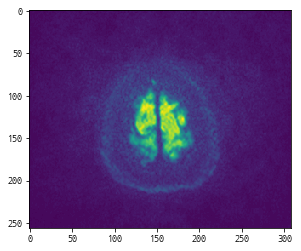

In [119]:
plt.imshow(dwi_im[0])

In [99]:
def find_aihub_img_label_dirs(fname, mod='train'):
    if mod == 'train':
        img_dir = os.path.join(common_dir, '01.데이터/1.Training/원천데이터', fname, 'init/image')
        mask_dir = os.path.join(common_dir, '01.데이터/1.Training/라벨링데이터', fname, 'init/mask')
    elif mod == 'val':
        img_dir = os.path.join(common_dir, '01.데이터/2.Validation/원천데이터', fname, 'init/image')
        mask_dir = os.path.join(common_dir, '01.데이터/2.Validation/라벨링데이터', fname, 'init/mask')
    else:
        return None
    return [img_dir, mask_dir]


def pair_img_mask_path(fname, mod='train'):
    img_dir, mask_dir = find_aihub_img_label_dirs(fname, mod)
    img_path_ls = sorted(glob.glob(os.path.join(img_dir, '*.png')))
    if len(img_path_ls) == 0:
        return None
    img_path_dict = {os.path.splitext(os.path.basename(p))[0]:p for p in img_path_ls}
    if os.path.isdir(mask_dir):
        mask_path_ls = sorted(glob.glob(os.path.join(mask_dir, '*.png')))
        mask_path_dict = {os.path.splitext(os.path.basename(p))[0]:p for p in mask_path_ls}
    else:
        mask_path_dict = {}
    paired_list = []
    for imgnum, imgpath in img_path_dict.items():
        paired_list.append([imgpath, mask_path_dict.get(imgnum)])
    return paired_list


def find_aihub_img_label_paths(common_dir, mod='train'):
    if mod=='train':
        data_dir = os.path.join(common_dir, '01.데이터/1.Training/원천데이터')
    elif mod=='val':
        data_dir = os.path.join(common_dir, '01.데이터/2.Validation/원천데이터')
        
    _fname = os.listdir(data_dir)
    _fname = [p for p in _fname if os.path.isdir(os.path.join(data_dir, p))]
    paths_list = []
    for fname in _fname:
        tmp = pair_img_mask_path(fname, mod)
        if tmp:
            for p in tmp:
                paths_list.append(p)
    img_list, mask_list = list(zip(*paths_list))
    return img_list, mask_list

def find_dwi_adc_dir(img_folder_dir, fname):
    dwi_folder_dir = os.path.join(img_folder_dir, fname, 'dwi')
    adc_folder_dir = os.path.join(img_folder_dir, fname, 'adc')
    if (os.path.isdir(dwi_folder_dir)) & (os.path.isdir(adc_folder_dir)):
        return dwi_folder_dir, adc_folder_dir
    else:
        return None
    
def find_mask_dir(mask_folder_dir, fname):
    mask_folder_dir = os.path.join(mask_folder_dir, fname)
    if (os.path.isdir(mask_folder_dir)):
        return mask_folder_dir
    else:
        return None

In [100]:
import shutil

In [101]:
common_dir = '/home/ncp/workspace/202002n050/050.신경계 질환 관련 임상 및 진료 데이터'
savepoint = '/home/ncp/workspace/blocks3/original_mask'
for fname, folder in tqdm(case_name_folder):
    _, mask_dir = find_aihub_img_label_dirs(fname, folder)
    copy_dir = os.path.join(savepoint, fname)
    try:
        shutil.copytree(mask_dir, copy_dir)
    except:
        pass

  0%|          | 0/4869 [00:00<?, ?it/s]

In [121]:
save_dir = '/home/ncp/workspace/blocks3/refined_mask'

img_common_dir = '/home/ncp/workspace/blocks3/dicom_to_png_2d'
mask_common_dir = '/home/ncp/workspace/blocks3/original_mask'

for fname in tqdm(sorted(os.listdir(img_common_dir))):
    dwi_adc_folder_dir = find_dwi_adc_dir(img_common_dir, fname)
    mask_folder_dir = find_mask_dir(mask_common_dir, fname)
    save_point = os.path.join(save_dir, fname)
    gen_new_dir(save_point)
    if dwi_adc_folder_dir:
        dwi_folder_dir, adc_folder_dir = dwi_adc_folder_dir
        dwi_path_ls = load_file_path(dwi_folder_dir, IMG_EXTENSION)
        dwi_img = np.array(Image.open(dwi_path_ls[0]))
        for idx in range(len(dwi_path_ls)):
            if mask_folder_dir:
                mask_path = os.path.join(mask_folder_dir, str(idx).zfill(3)+'.png')
                if os.path.isfile(mask_path):
                    mask_img = np.array(Image.open(mask_path))
                else:
                    mask_img = np.zeros_like(dwi_img)
                Image.fromarray(mask_img).save(os.path.join(save_point, str(idx).zfill(3)+'.png'))
            else:
                mask_img = np.zeros_like(dwi_img)
                Image.fromarray(mask_img).save(os.path.join(save_point, str(idx).zfill(3)+'.png'))

  0%|          | 0/4154 [00:00<?, ?it/s]

In [122]:
def gen_2d_slices_to_3d(img_2d_path_ls):
    img_3d = np.stack([np.array(Image.open(p)) for p in img_2d_path_ls], axis=0)
    img_3d = resample_3d(img_3d)
    img_3d = np.where(img_3d>128, 1, 0).astype(np.float32)
    return img_3d

In [123]:
savepoint = '/home/ncp/workspace/blocks3/refined_mask_resample'
gen_new_dir(savepoint)
mask_common_dir = '/home/ncp/workspace/blocks3/refined_mask'
mask_fname_ls = os.listdir(mask_common_dir)
for fname_ in tqdm(mask_fname_ls):
    mask_path_ls = sorted(load_file_path(os.path.join(mask_common_dir, fname_), IMG_EXTENSION),reverse=True)
    img_3d = gen_2d_slices_to_3d(mask_path_ls)
    save_arr_to_np(img_3d, savepoint, fname_)

  0%|          | 0/4154 [00:00<?, ?it/s]

In [15]:
## get 2d lesion area ##

In [16]:
len(os.listdir('/home/ncp/workspace/blocks1/dicom_to_png_2d/'))

5274

In [17]:
def read_2d_mask_3dim(mask_path_ls):
    mask_path_ls = sorted(mask_path_ls)
    return np.stack([np.array(Image.open(p)) for p in mask_path_ls], axis=0) > 0

In [47]:
common_dir = '/home/ncp/workspace/blocks1/dicom_to_png_2d/'
predicted_lesion_area_ls = []
for fname in tqdm(os.listdir(common_dir)):
    mask_dir = os.path.join(common_dir, fname, 'pred_masks')
    mask_path_ls = load_file_path(mask_dir, IMG_EXTENSION)
    if len(mask_path_ls) > 0:
        mask_3d = read_2d_mask_3dim(mask_path_ls)
        
        predicted_lesion_area_ls.append([fname, np.sum(mask_3d)/(mask_3d.shape[0]*256*256)*10])

  0%|          | 0/5274 [00:00<?, ?it/s]

In [49]:
pred_lesion_area_df = pd.DataFrame(predicted_lesion_area_ls, columns=['name', 'pred_lesion_area'])

In [50]:
pred_lesion_area_df.to_csv('/home/ncp/workspace/blocks2/pred_lesion_area_df_og.csv', index=False)

In [55]:
pred_lesion_area_df.pred_lesion_area.values.max()

0.5847399162523674

In [56]:
tabular_df = pd.read_csv('/home/ncp/workspace/AIHUB_dataset/df_csv_merged_v2.1.1.csv')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (117) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [57]:
data_df = pd.read_csv('/home/ncp/workspace/blocks1/aihub_df_v.1.2.csv')

In [58]:
data_df

name  good_outcome_3m  mrs_3m  END  excel_outcome_3m  \
0       brain_mri_1000199                1       0    0                 1   
1       brain_mri_1000539                1       0    0                 1   
2       brain_mri_CC_0459                1       1    0                 1   
3       brain_mri_CC_0391                1       1    0                 1   
4       brain_mri_1000900                1       1    0                 1   
5       brain_mri_CC_0851                1       2    0                 0   
6       brain_mri_1000401                1       0    0                 1   
7       brain_mri_CC_1053                0       5    0                 0   
8       brain_mri_CC_0338                0       5    0                 0   
9       brain_mri_CC_1054                0       5    0                 0   
10    brain_mri_2013-1443                1       0    0                 1   
11    brain_mri_2013-0981                1       2    0                 0   
12      brain_mri_1000357                1       2    0                 0   
13    brain_mri_2013-3237                1       1    0                 1   
14    brain_mri_2019-0051                0       4    0                 0   
15    brain_mri_2013-1152                1       1    0                 1   
16    brain_mri_2013-4334                1       0    0                 1   
17      brain_mri_CC_0057                1       1    0                 1   
18    brain_mri_2013-1122                0       4    0                 0   
19    brain_mri_2013-4538                0       4    0                 0   
20    brain_mri_2013-4597                1       1    0                 1   
21      brain_mri_1000191                1       1    0                 1   
22      brain_mri_1000253                1       0    0                 1   
23    brain_mri_2013-1355                0       6    0                 0   
24      brain_mri_CC_1138                1       2    0                 0   
25    brain_mri_2013-4906                1       2    0                 0   
26    brain_mri_2013-4421                1       2    0                 0   
27      brain_mri_CC_0980                0       6    0                 0   
28      brain_mri_1000241                1       1    0                 1   
29      brain_mri_1000788                1       1    0                 1   
...                   ...              ...     ...  ...               ...   
5244  brain_mri_2013-3542                1       2    0                 0   
5245  brain_mri_2013-3638                1       0    0                 1   
5246  brain_mri_2013-4315                0       4    0                 0   
5247  brain_mri_2013-4244                1       1    0                 1   
5248  brain_mri_2013-3656                1       1    0                 1   
5249  brain_mri_2013-3525                1       0    0                 1   
5250  brain_mri_2013-4196                0       3    0                 0   
5251  brain_mri_2013-3780                1       0    0                 1   
5252  brain_mri_2013-3637                1       0    0                 1   
5253  brain_mri_2013-3640                1       0    0                 1   
5254  brain_mri_2013-3534                1       0    0                 1   
5255  brain_mri_2013-3766                0       3    0                 0   
5256  brain_mri_2013-3568                1       1    0                 1   
5257  brain_mri_2013-4209                1       0    0                 1   
5258  brain_mri_2013-3753                1       0    0                 1   
5259  brain_mri_2013-3576                1       2    0                 0   
5260  brain_mri_2013-3675                1       0    0                 1   
5261  brain_mri_2013-3539                1       1    0                 1   
5262  brain_mri_2013-3825                1       0    0                 1   
5263  brain_mri_2013-4152                1       0    0                 1   
5264  brain_mri_2

In [ ]:
tabular_info_arr = []
label_arr = []
for f_path, _, _, label in test_dataset.dataset:
    fname = os.path.splitext(os.path.basename(f_path))[0]
    tabular_info = tabular_df[tabular_df.name == fname][['pre_good_mrs', 'age_cate', 'ini_nih', 'END', 'hx_str']].values
    tabular_info_arr.append(tabular_info)
    label_arr.append(label)
tabular_info_arr = np.array(tabular_info_arr)
label_arr = np.array(label_arr)